Code to import the data

In [16]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [17]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

Question 3a.  

In [18]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [19]:
# Fit the CART model
dtree = DecisionTreeClassifier(random_state = 42)
dtree = dtree.fit(X, y)

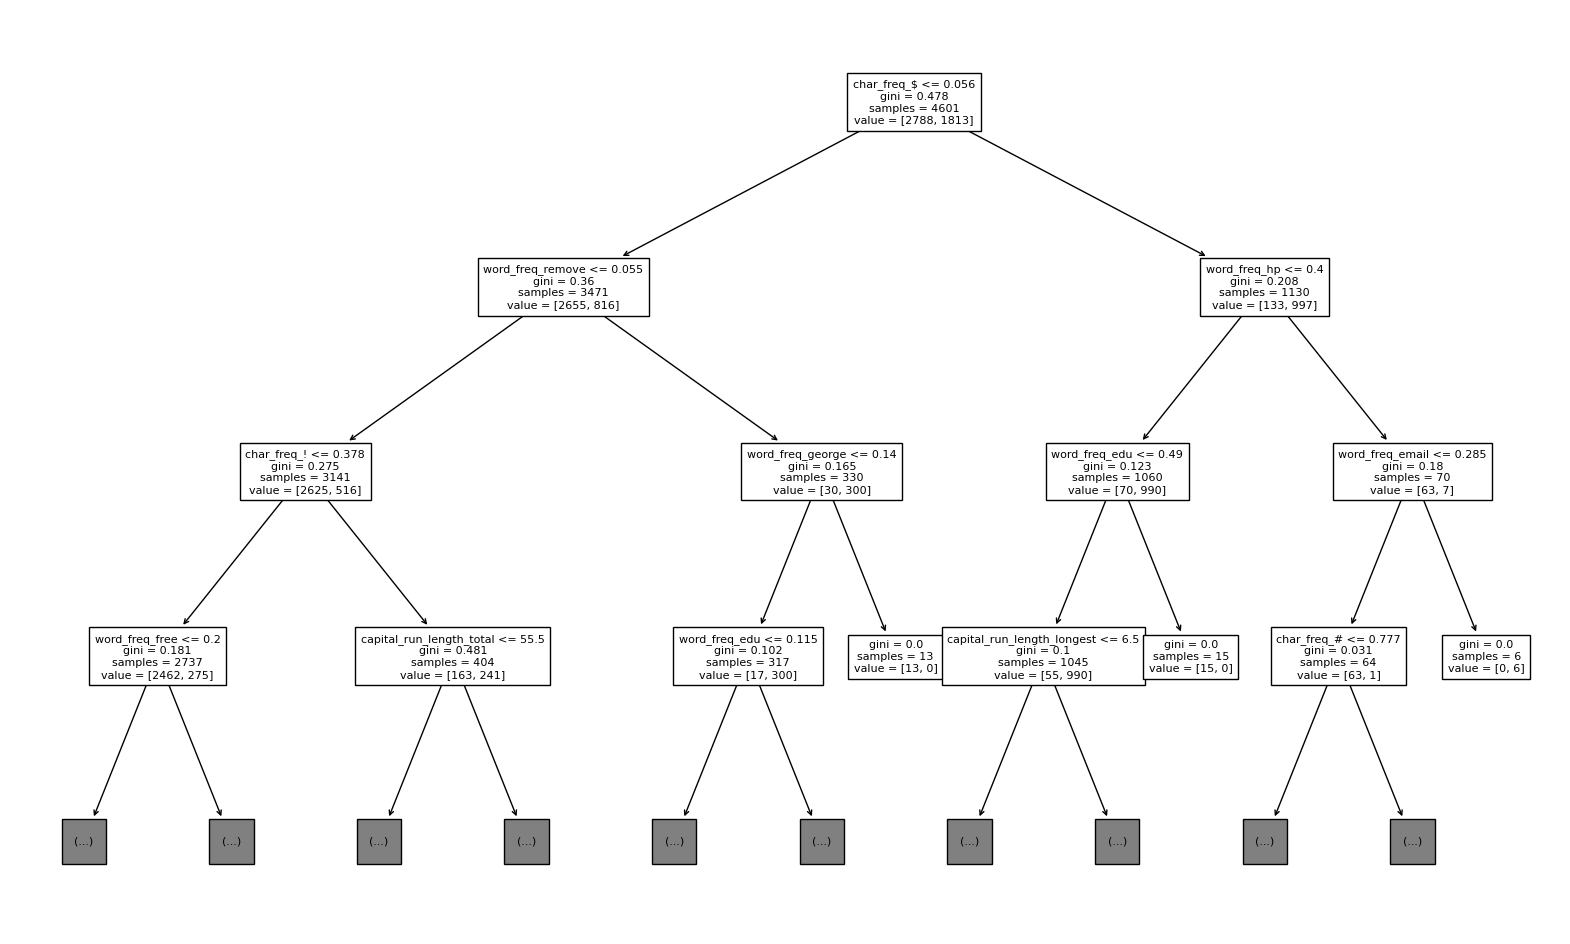

In [20]:
fig, ax = plt.subplots(figsize=(20,12), dpi = 100)
plot_tree(dtree, max_depth=3, feature_names=X.columns, fontsize=8)
plt.savefig('Q3a.png')

Question 3b

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
y_train

,Class
1173,1
1954,0
256,1
3341,0
4469,0
...,...
4426,0
466,1
3092,0
3772,0


In [24]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [25]:
dtree = DecisionTreeClassifier(random_state = 42)
dtree = dtree.fit(X_train, y_train.values.ravel())

In [26]:
y_dt_test_predictions= dtree.predict(X_test)
y_rf_test_predictions = rf.predict(X_test)

In [27]:
error_dtree = 1-accuracy_score(y_test, y_dt_test_predictions)
error_rf = 1-accuracy_score(y_test, y_rf_test_predictions)

In [28]:
print("Test error for decision tree:", round(error_dtree,4))

Test error for decision tree: 0.0851


In [29]:
print("Test error for random forest:", round(error_rf,4))

Test error for random forest: 0.0417


In [30]:
min_tree = 1
max_tree = 200

n = []
errors = []

for i in range(1, 201):
    rf_instance = RandomForestClassifier(random_state=42, n_estimators=i) 
    rf_instance.fit(X_train, y_train.values.ravel())
    y_pred_instance = rf_instance.predict(X_test)
    error_instance = 1 - accuracy_score(y_test, y_pred_instance)  
    n.append(i)
    errors.append(error_instance)

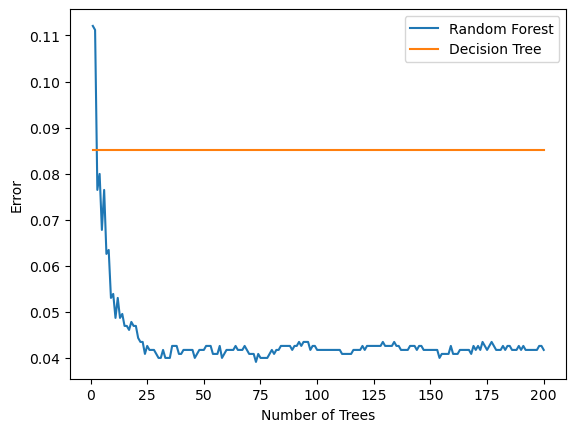

In [31]:
dtree_errors = np.ones(len(n))*error_dtree

plt.plot(n, errors)
plt.plot(n,dtree_errors)
plt.legend(["Random Forest", "Decision Tree"], loc = "upper right")
plt.ylabel("Error")
plt.xlabel("Number of Trees")
plt.savefig("Q3b.png")
plt.show()

Question 3c

In [32]:
max_features = len(X.columns)
n = []
oob_errors = []
test_errors = []
for i in range(1,max_features+1):
    rf_instance = RandomForestClassifier(random_state=42, max_features = i, oob_score = True) 
    rf_instance.fit(X_train, y_train.values.ravel())
    oob_error = 1-rf_instance.oob_score_
    oob_errors.append(oob_error)
    y_pred_instance = rf_instance.predict(X_test)
    error_instance = 1 - accuracy_score(y_test, y_pred_instance)  
    n.append(i)
    test_errors.append(error_instance)

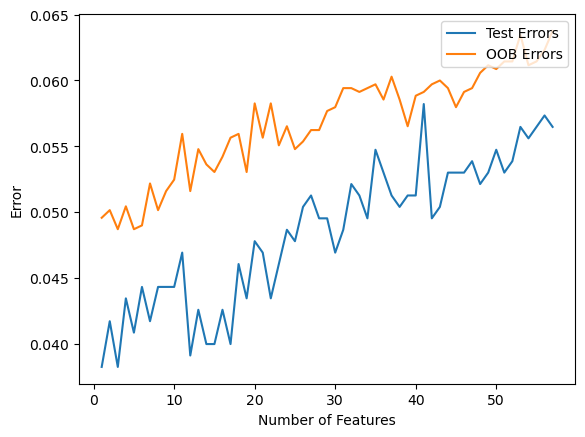

In [33]:
plt.plot(n, test_errors)
plt.plot(n,oob_errors)
plt.legend(["Test Errors", "OOB Errors"], loc = "upper right")
plt.ylabel("Error")
plt.xlabel("Number of Features")
plt.savefig("Q3c.png")
plt.show()

Question 3d

In [34]:
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
X_train_spam = X_train[y_train['Class']==0]

In [37]:
params_grid = {
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],  
    'nu': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],  
    'kernel': ['rbf']  
}

In [38]:
grid_clf = GridSearchCV(OneClassSVM(), params_grid, scoring='accuracy', cv=5)
grid_clf.fit(X_train_spam, np.ones(X_train_spam.shape[0]))

GridSearchCV(cv=5, estimator=OneClassSVM(),
             param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf'],
                         'nu': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='accuracy')

In [39]:
best_oc_svm = grid_clf.best_estimator_
print(best_oc_svm)

OneClassSVM(gamma=0.001, nu=0.01)


In [40]:
y_svm_predictions = grid_clf.predict(X_test)
y_svm_predictions = np.where(y_svm_predictions == 1, 0, 1)

final_error_svm = 1 - accuracy_score(y_test, y_svm_predictions)
print(f"Error Rate with optimal parameters: {final_error_svm:.4f}")

Error Rate with optimal parameters: 0.3032
